# Welding Quality Prediction - Data Preprocessing

The goal of this project is to predict the quality of welds on steel. This issue is of great interest to many industries, representing a sector worth several billion euros (for example, the welding of wind turbine pipes). Today, knowledge about welding quality is mainly transferred from expert to expert welder, making industries dependent on this expertise. There is a major challenge in using data to both capture and standardize expert knowledge, and to uncover new insights through data-driven pattern discovery.
We can access the welding data via the following link: https://www.phase-trans.msm.cam.ac.uk/map/data/materials/welddb-b.html

##  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import os, re, math
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')

print(" Libraries imported successfully!")


 Libraries imported successfully!


## Load and Initial Data Assessment

In [2]:
# Load the dataset with proper headers
data_file_path = 'welddatabase\\welddb.data'

# Define column headers based on the data description
headers = [
    'Carbon_%', 'Silicon_%', 'Manganese_%', 'Sulphur_%', 'Phosphorus_%',
    'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%',
    'Cobalt_%', 'Tungsten_%', 'Oxygen_ppm', 'Titanium_ppm', 'Nitrogen_ppm',
    'Aluminium_ppm', 'Boron_ppm', 'Niobium_ppm', 'Tin_ppm', 'Arsenic_ppm',
    'Antimony_ppm', 'Current_A', 'Voltage_V', 'AC_DC', 'Electrode_Polarity',
    'Heat_Input_kJ_mm', 'Interpass_Temp_C', 'Weld_Type', 'PWHT_Temp_C',
    'PWHT_Time_hours', 'Yield_Strength_MPa', 'UTS_MPa', 'Elongation_%',
    'Reduction_Area_%', 'Charpy_Temp_C', 'Charpy_Energy_J', 'Hardness_kg_mm2',
    'FATT_50%', 'Primary_Ferrite_%', 'Ferrite_2nd_Phase_%', 'Acicular_Ferrite_%',
    'Martensite_%', 'Ferrite_Carbide_%', 'Weld_ID'
]

# Load the data with headers
df = pd.read_csv(data_file_path, sep=r'\s+', header=None, names=headers)

print(f"Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")

# Transform 'N' values to NaN (missing values)
print("Converting 'N' values to NaN...")
n_count_before = (df == 'N').sum().sum()
df = df.replace('N', np.nan)
n_count_after = (df == 'N').sum().sum()

print(f"Converted {n_count_before} 'N' values to NaN")
print(f"Remaining 'N' values: {n_count_after}")

# Check for missing values after conversion
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print(f"\nMissing Data Summary:")
print(f"Columns with no missing data: {(missing_percent == 0).sum()}")
print(f"Columns with some missing data: {((missing_percent > 0) & (missing_percent < 100)).sum()}")
print(f"Columns with all missing data: {(missing_percent == 100).sum()}")

# Show first few rows
print("\nFirst 5 rows:")
df.head()

# Save the processed dataframe as CSV
output_csv_path = 'welddatabase\\welddb.csv'
df.to_csv(output_csv_path, index=False)
print(f"\nProcessed dataset saved as CSV: {output_csv_path}")
print(f"File contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset loaded: 1652 rows × 44 columns
Converting 'N' values to NaN...
Converted 33141 'N' values to NaN
Remaining 'N' values: 0

Missing Data Summary:
Columns with no missing data: 7
Columns with some missing data: 37
Columns with all missing data: 0

First 5 rows:

Processed dataset saved as CSV: welddatabase\welddb.csv
File contains 1652 rows and 44 columns

Processed dataset saved as CSV: welddatabase\welddb.csv
File contains 1652 rows and 44 columns


## Weld ID Analysis and Processing

The Weld ID contains valuable information about the welding experiments. This code extracts and analyzes the unique identifiers to understand the data structure better.

**Weld ID Format Analysis:**
- Format: `Author-Experiment/Year-Variant-Suffix`
- Example: `Evans-Ni/CMn-1990/1991-0Aaw`
- Contains: Author, Material, Year, Variant, and additional identifiers


In [3]:
# Weld ID Analysis and Processing
print("Weld ID Analysis:")
print("=" * 25)
L = []
for i in df['Weld_ID'].unique():
    if i.split('/')[0] not in L:
        L.append(i.split('/')[0])
L1 = []
for i in L:
    if i.split('-')[0] not in L1:
        try :
            L1.append(i.split('-')[0].concat(i.split('-')[1]))
        except:
            L1.append(i.split('-')[0])
L2 = []
for i in L1:
    if i.split('+')[0] not in L2:
        L2.append(i.split('+')[0])
print(f"Found {len(L2)} final unique identifiers")
print(f"All final identifiers:")
for i, identifier in enumerate(L2):
    print(f"  {i+1}. {identifier}")

print(f"\nAnalysis completed! Total unique identifiers: {len(L2)}")

Weld ID Analysis:
Found 59 final unique identifiers
All final identifiers:
  1. Evans
  2. Es
  3. KocakPEv
  4. KocakPREv
  5. SurianEtAl
  6. Alekseev&
  7. RaiterGonzal
  8. SvenGret
  9. PakSven
  10. JorgeEtAl
  11. Hunt&
  12. Kluket
  13. Cunh
  14. Pat
  15. Wats
  16. EvHtIp1979
  17. Stil
  18. Gar&K
  19. Ga&K
  20. PantK
  21. EPRI
  22. Chandel&
  23. Icici&
  24. Blond&
  25. Natsume
  26. Mart
  27. Sw&Rog
  28. Kik
  29. Wolst
  30. Ditt
  31. Inag&
  32. p9
  33. p10
  34. p11
  35. p12
  36. p13
  37. p14
  38. p15
  39. p16
  40. p21
  41. p22
  42. p23
  43. p24
  44. p25
  45. RC81033
  46. p26
  47. p28
  48. p29
  49. p30
  50. p31
  51. p32
  52. p33
  53. p34
  54. p35
  55. p36
  56. EvansLetter
  57. EvansLetterCo
  58. EvansLetterC
  59. Birmingham

Analysis completed! Total unique identifiers: 59


The **`source_lab`** column identifies where each weld record comes from — the researcher or lab that produced the data. Examples like *Evans*, *EsSouni*, and *Birmingham* show different experimental sources or projects. This information helps track data origin, compare results between research groups, and control for lab-to-lab differences when analyzing or modeling weld properties.


In [4]:
# Create source_lab column from weld_id (using copy to preserve original df)
print("Creating source_lab column from weld_id...")

# Work with a copy to preserve original dataframe
df_lab = df.copy()

# Extract source lab (first part before '/', then first part before '-')
df_lab['source_lab'] = df_lab['Weld_ID'].str.split('/').str[0].str.split('-').str[0]

print(f"Source lab column created with {df_lab['source_lab'].nunique()} unique labs")
print(f"Sample source labs: {df_lab['source_lab'].unique()[:10].tolist()}")

# Check for any missing values
missing_labs = df_lab['source_lab'].isnull().sum()
print(f"Missing source lab values: {missing_labs}")

# Show distribution
lab_counts = df_lab['source_lab'].value_counts()
print(f"\nTop 10 source labs by count:")
for i, (lab, count) in enumerate(lab_counts.head(10).items()):
    print(f"  {i+1}. {lab}: {count} experiments")


Creating source_lab column from weld_id...
Source lab column created with 135 unique labs
Sample source labs: ['Evans', 'Es', 'KocakPEv', 'KocakPREv', 'SurianEtAl', 'Alekseev&', 'RaiterGonzal', 'SvenGret', 'PakSven', 'JorgeEtAl']
Missing source lab values: 0

Top 10 source labs by count:
  1. Evans: 700 experiments
  2. SvenGret: 96 experiments
  3. Pat: 79 experiments
  4. EvansLetter: 78 experiments
  5. Mart: 70 experiments
  6. Gar&K: 56 experiments
  7. PantK: 54 experiments
  8. Cunh: 38 experiments
  9. Wolst: 32 experiments
  10. EvHtIp1979: 32 experiments


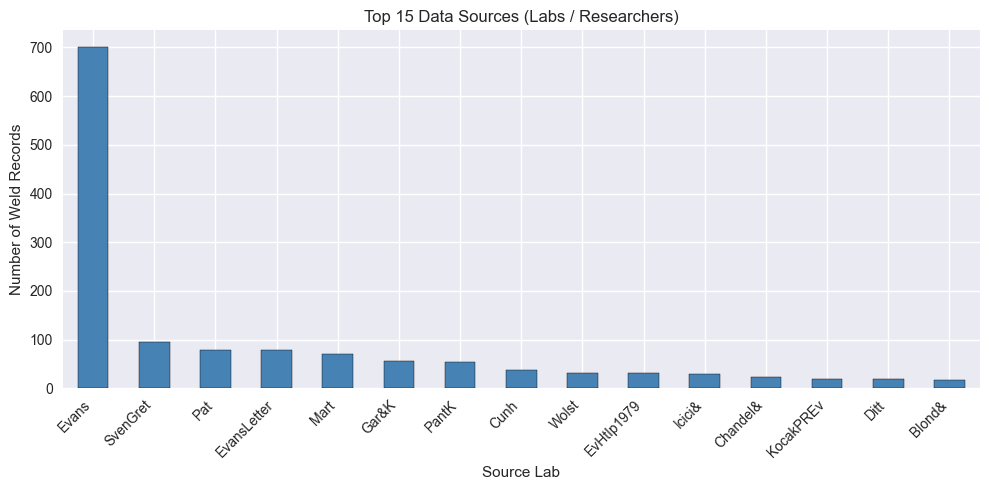

In [5]:
lab_counts = df_lab['source_lab'].value_counts().head(15)

plt.figure(figsize=(10,5))
lab_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 15 Data Sources (Labs / Researchers)')
plt.xlabel('Source Lab')
plt.ylabel('Number of Weld Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This chart shows that the Evans research group overwhelmingly dominates the dataset, contributing nearly 700 weld records, while all other sources provide fewer than 100 each. Groups like SvenGret, Pat, and EvansLetter follow far behind.

## Detect ambiguous values

I created this function `report_ambiguous_numeric_values()` to automatically check my dataset for columns that contain **ambiguous or non-numeric values**.

The function first tries to **convert all columns into numeric format** whenever possible.  
If a column can’t be fully converted (because it includes text, symbols, or mixed data), it keeps that column as `object`.

After this conversion, the function scans all the remaining `object` columns and lists the **non-numeric or ambiguous values** they contain — such as entries like `<0.002`, `158(Hv30)`, or strings with units or words.

The output is displayed as a **well-structured table**, showing:
- The column name  
- The number of unique ambiguous values  
- A few examples of those values  

This helps me quickly identify which columns still contain problematic data that need **cleaning, interpretation, or transformation** before I can use them for analysis or modeling.

In [6]:
def report_ambiguous_numeric_values(df):
    """
    Convert DataFrame columns to numeric when possible and
    display a formatted table of ambiguous (non-numeric) values
    found in object columns.
    """
    # Step 1: Try converting all columns to numeric where possible
    def _convert_column(col):
        try:
            return pd.to_numeric(col)
        except ValueError:
            return col

    df_converted = df.apply(_convert_column)
    print("Data types after attempted numeric conversion:\n")
    print(df_converted.dtypes.value_counts(), "\n")

    # Step 2: Identify object columns remaining
    object_columns = df_converted.select_dtypes(include=["object"]).columns
    ambiguous_summary = []

    # Step 3: Collect ambiguous/non-numeric values per object column
    for column in object_columns:
        non_numeric = df_converted[column][pd.to_numeric(df_converted[column], errors="coerce").isna()].unique()
        ambiguous_summary.append([column, len(non_numeric), non_numeric[:10]])

    # Step 4: Display results as a pretty table
    if ambiguous_summary:
        table = pd.DataFrame(ambiguous_summary, columns=["Column", "Unique Ambiguous Values", "Examples"])
        print(tabulate(table, headers="keys", tablefmt="grid", showindex=False))
    else:
        print("No ambiguous (non-numeric) values detected.")

    return df_converted


# Example usage:
df_cleaned = report_ambiguous_numeric_values(df)


Data types after attempted numeric conversion:

float64    23
object     21
Name: count, dtype: int64 

+--------------------+---------------------------+-----------------------------------------------------------------------+
| Column             |   Unique Ambiguous Values | Examples                                                              |
+====================+===========================+=======================================================================+
| Sulphur_%          |                         2 | ['<0.002' nan]                                                        |
+--------------------+---------------------------+-----------------------------------------------------------------------+
| Molybdenum_%       |                         2 | [nan '<0.01']                                                         |
+--------------------+---------------------------+-----------------------------------------------------------------------+
| Vanadium_%         |             

###  Interpretation of Ambiguous Experimental Values

When inspecting the output of the `report_ambiguous_numeric_values()` function, we observed that several columns contain values such as **`48tot18res`**, **`<0.01`**, and **`158(Hv30)`**.  
These are not simple numeric entries — they reflect **experimental or reporting conventions** used in welding and materials science data.  
Here’s what they mean physically and how we should interpret them:


#### 1. `<0.01` (and similar values like `<0.002`, `<5`, `<100`)
These values indicate that the **element’s concentration is below the detection limit** of the analytical instrument.  
For example, `<0.01` means the actual amount of that element is **too low to be measured accurately**, but is known to be **less than 0.01% or 0.01 ppm** depending on the column.  

From a physical standpoint, this happens when the alloying element or impurity is nearly absent or within trace limits.  
When preparing data for analysis, these can be replaced by the numeric threshold (e.g., `0.01`) to preserve a conservative upper estimate, while noting that the real value is smaller.


#### 2. `158(Hv30)` (and other forms like `459Hv10`, `170(Hv5)`)
This format is used in **hardness testing**, specifically **Vickers hardness (HV)**.  
- The number before the parentheses (e.g., `158`) is the **measured hardness value**.  
- The text inside or after the parentheses (e.g., `Hv30`) specifies the **test load**, meaning the hardness was measured using a 30 kgf load.

So `158(Hv30)` means a **Vickers hardness of 158 measured with a 30 kgf load**.  
It provides both the result and the test condition — crucial for comparing results since hardness can depend on the applied load.


#### 3. `48tot18res` (and similar patterns like `67tot33res`)
These notations appear in columns related to **nitrogen or other gas measurements** and represent the **percentage distribution between two material phases or forms**:
- `tot` stands for **total**, and  
- `res` refers to **residual** (often “residual nitrogen” or “retained nitrogen”).

Thus, `48tot18res` likely means that **48% of total nitrogen** and **18% of residual nitrogen** were measured in that specimen.  
Such values describe **phase partitioning or retained content** after solidification or heat treatment, often reported in microstructural characterization studies.

### Why These Values Matter

These ambiguous formats carry **important physical meaning** rather than being simple data errors:
- `<x` values describe **instrumental detection limits** (analytical sensitivity).  
- `HV` values specify **mechanical test results with defined conditions**.  
- `tot/res` patterns describe **compositional or phase distribution**.



In [7]:
def clean_ambiguous_values(df):
    """
    Clean ambiguous numeric values directly in the dataframe:
      • <0.01, >5 → replaced by numeric bound (0.01, 5)
      • Nitrogen_ppm → replace patterns like 48tot18res with mean(48,18)
      • Interpass_Temp_C → replace ranges like 150-200 with median(175)

    Each rule applies only where it has physical meaning.
    """

    df = df.copy()

    # Columns that should remain untouched
    exclude_cols = [
        "Weld_ID", "Weld_Type", "AC_DC", "Electrode_Polarity",
        "Voltage_V", "Current_A"
    ]

    for col in df.columns:
        if col in exclude_cols:
            continue  # Skip categorical or identifier columns

        if df[col].dtype == object:
            cleaned_values = []

            for val in df[col]:
                if pd.isna(val):
                    cleaned_values.append(np.nan)
                    continue

                val_str = str(val).strip()

                # Case 1: comparator values like <0.01 → 0.01 (applies everywhere)
                m = re.match(r"^\s*[<>]=?\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s*$", val_str)
                if m:
                    cleaned_values.append(float(m.group(1)))
                    continue

                # Case 2: tot/res patterns like 48tot18res → mean(48,18) (only Nitrogen_ppm)
                if col == "Nitrogen_ppm":
                    """
                    Using the mean for values like 48tot18res provides a balanced numerical estimate 
                    when two related measurements (total and residual) are reported together. Since these 
                    values represent upper and lower limits of the same property, averaging them offers 
                    a reasonable midpoint that preserves the scale and order of magnitude without 
                    discarding data.
                    """
                    m = re.match(r"(\d+)\s*tot\s*(\d+)\s*res", val_str, flags=re.IGNORECASE)
                    if m:
                        mean_val = (float(m.group(1)) + float(m.group(2))) / 2
                        cleaned_values.append(mean_val)
                        continue

                # Case 3: range values like 150-200 → median (175) (only Interpass_Temp_C)
                if col == "Interpass_Temp_C":
                    """
                    For ranges reported as 150-200, the median (175) is used as the most
                    physically neutral estimate of the actual experimental condition.
                    It avoids biasing toward minimum or maximum temperatures or stresses
                    when the exact point within the range is unknown.
                    """
                    m = re.match(r"^\s*(-?\d+(?:\.\d+)?)\s*-\s*(-?\d+(?:\.\d+)?)\s*$", val_str)
                    if m:
                        median_val = (float(m.group(1)) + float(m.group(2))) / 2
                        cleaned_values.append(median_val)
                        continue

                # Default: try normal numeric conversion
                try:
                    cleaned_values.append(float(val_str))
                except ValueError:
                    cleaned_values.append(np.nan)

            df[col] = cleaned_values

    return df

In [8]:
# Quick peek at non-numeric hardness entries (simple)
hard_col = 'Hardness_kg_mm2'
if hard_col in df.columns:
    s = df[hard_col]
    coerced = pd.to_numeric(s, errors='coerce')
    problematic_entries = s[coerced.isna() & s.notna()].astype(str).str.strip().unique()
    print(problematic_entries)
else:
    print(f"Column '{hard_col}' not found in dataframe")

['158(Hv30)' '155(Hv30)' '153(Hv30)' '161(Hv30)' '168(Hv30)' '203(Hv30)'
 '157(Hv30)' '174(Hv30)' '144(Hv30)' '143(Hv30)' '154(Hv30)' '170(Hv30)'
 '459Hv10' '405Hv10' '451Hv10' '432Hv10' '264Hv10' '241Hv10' '251Hv10'
 '225Hv10' '233Hv10' '208Hv10' '373Hv10' '224Hv10' '210Hv10' '212Hv10'
 '202Hv10' '204Hv10' '201Hv10' '398Hv10' '249Hv10' '226Hv10' '234Hv10'
 '219Hv10' '467Hv10' '277Hv10' '254Hv10' '263Hv10' '237Hv10' '362Hv10'
 '291Hv10' '262Hv10' '266Hv10' '253Hv10' '257Hv10' '246Hv10' '264Hv5'
 '269Hv5' '233Hv5' '226Hv5']


## Vickers Hardness (HV)

The **Vickers hardness (HV)** measures a material's **resistance to plastic deformation** when a diamond indenter is pressed onto its surface. It is expressed as `158HV30`, where 158 is the hardness value, *HV* is the test type, and 30 is the applied load in **kilogram-force (kgf)**.

**Physical Principle:** A diamond pyramid with an angle of 136° is pressed into the material with a load $F$, and the average diagonal $d$ of the indentation is measured. The hardness is calculated as:

$$
HV = \frac{1.854 \times F}{d^2}
$$

where $F$ is the applied load (kgf) and $d$ is the average diagonal length (mm).

**Interpretation:** A higher **HV** value indicates a **harder material**. Common test loads are HV5 (5 kgf), HV10 (10 kgf), and HV30 (30 kgf). To compare data measured under different loads, values should be **standardized to a single reference load**, because indentation size can slightly vary with load.

Standardization can be done by converting all results to a reference condition (usually **HV10**) using empirical relations or conversion charts:

$$
HV_{\text{ref}} = HV_{\text{measured}} \times \left(\frac{F_{\text{ref}}}{F_{\text{measured}}}\right)^n
$$

where $n$ is typically around **0.1** for steels.

**Mechanical Correlations:** Approximate relationships exist between Vickers hardness and mechanical properties:

$$
\sigma_y \approx \frac{HV}{3} \quad \text{and} \quad \sigma_u \approx \frac{HV}{2.9}
$$

where $\sigma_y$ is the **yield strength** and $\sigma_u$ is the **ultimate tensile strength** (in MPa).

In [9]:
# Clean parentheses from hardness values and standardize to HV10
hardness_col = 'Hardness_kg_mm2'

# Remove parentheses only for non-null entries (e.g., '158(Hv30)' -> '158Hv30')
if hardness_col in df.columns:
    mask = df[hardness_col].notna()
    df.loc[mask, hardness_col] = (
        df.loc[mask, hardness_col]
          .astype(str)
          .str.replace(r'[\(\)]', '', regex=True)
          .str.strip()
    )

n = 0.1
F_REF = 10.0

def standardize_hv(value):
    # just one needed
    if pd.isna(value):
        return np.nan
    s = str(value).strip()

    m = re.match(r'^(-?\d+(?:\.\d+)?)\s*[Hh][Vv]\s*([0-9]+(?:\.[0-9]+)?)$', s)
    if m:
        hv_measured = float(m.group(1))
        F_measured = float(m.group(2))
    else:
        try:
            hv_measured = float(s)
            F_measured = F_REF  # assume HV10 if load not specified
        except Exception:
            return np.nan

    return hv_measured * (F_REF / F_measured) ** n

# Apply standardization
if hardness_col in df.columns:
    df[hardness_col] = df[hardness_col].apply(standardize_hv)

# Quick check
print('Hardness standardized to HV10. Dtype:', df[hardness_col].dtype)
print('Sample values:', df[hardness_col].dropna().head(10).tolist())

Hardness standardized to HV10. Dtype: float64
Sample values: [257.0, 227.0, 224.0, 226.0, 234.0, 217.0, 213.0, 209.0, 259.0, 239.0]


In [10]:
df['Hardness_kg_mm2'].unique()

array([         nan, 257.        , 227.        , 224.        ,
       226.        , 234.        , 217.        , 213.        ,
       209.        , 259.        , 239.        , 223.        ,
       230.        , 252.        , 241.        , 231.        ,
       229.        , 180.        , 174.        , 220.        ,
       184.        , 193.        , 189.        , 181.        ,
       183.        , 194.        , 216.        , 191.        ,
       164.        , 154.        , 265.        , 225.        ,
       196.        , 202.        , 197.        , 172.        ,
       141.56143665, 138.87356128, 137.08164436, 144.24931203,
       150.52102125, 181.87956735, 140.66547819, 155.89677201,
       129.01801822, 128.12205976, 137.97760282, 152.31293817,
       459.        , 405.        , 451.        , 432.        ,
       264.        , 251.        , 233.        , 208.        ,
       373.        , 210.        , 212.        , 204.        ,
       201.        , 398.        , 249.        , 219.  

In [11]:
df = clean_ambiguous_values(df)
df.head(10  )
df.dtypes.value_counts()

float64    38
object      6
Name: count, dtype: int64

In [12]:
def check_remaining_ambiguous_values(df):
    exclude = {"Weld_ID", "Weld_Type", "AC_DC", "Electrode_Polarity"}
    summary = []
    for col in df.columns:
        if col in exclude:
            continue
        s = df[col].dropna()
        if s.empty:
            continue
        s_str = s.astype(str).str.strip()
        mask = pd.to_numeric(s_str, errors='coerce').isna()
        if mask.any():
            examples = s_str[mask].unique()[:5].tolist()
            summary.append({"Column": col, "Count": int(mask.sum()), "Examples": examples})
    if summary:
        return pd.DataFrame(summary).sort_values("Count", ascending=False).reset_index(drop=True)
    print("All checked columns are clean (numeric or NaN).")
    return None

check_remaining_ambiguous_values(df)

All checked columns are clean (numeric or NaN).


All columns have been successfully converted to numeric format, indicating that the dataset is now fully cleaned and free of ambiguous or non-numeric values.


In [13]:
df.dtypes.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Carbon_%             1652 non-null   float64
 1   Silicon_%            1652 non-null   float64
 2   Manganese_%          1652 non-null   float64
 3   Sulphur_%            1648 non-null   float64
 4   Phosphorus_%         1642 non-null   float64
 5   Nickel_%             697 non-null    float64
 6   Chromium_%           784 non-null    float64
 7   Molybdenum_%         793 non-null    float64
 8   Vanadium_%           928 non-null    float64
 9   Copper_%             578 non-null    float64
 10  Cobalt_%             129 non-null    float64
 11  Tungsten_%           75 non-null     float64
 12  Oxygen_ppm           1256 non-null   float64
 13  Titanium_ppm         935 non-null    float64
 14  Nitrogen_ppm         1225 non-null   float64
 15  Aluminium_ppm        905 non-null    f

## Handling Categorical Columns


In [14]:
categorical_cols = ['AC_DC', 'Electrode_Polarity', 'Weld_Type']

print("Categorical columns in the dataset:")
print("=" * 40)
for col in categorical_cols:
    if col in df.columns:
        unique_count = df[col].nunique()
        null_count = df[col].isna().sum()
        print(f"\n{col}:")
        print(f"  • Unique values: {unique_count}")
        print(f"  • Missing values: {null_count}")
        print(f"  • Data type: {df[col].dtype}")
        if unique_count <= 10:
            print(f"  • Values: {df[col].dropna().unique().tolist()}")
        else:
            print(f"  • Sample values: {df[col].dropna().unique()[:10].tolist()}")
    else:
        print(f"\n{col}: NOT FOUND in dataframe")

Categorical columns in the dataset:

AC_DC:
  • Unique values: 2
  • Missing values: 215
  • Data type: object
  • Values: ['DC', 'AC']

Electrode_Polarity:
  • Unique values: 3
  • Missing values: 156
  • Data type: object
  • Values: ['+', '0', '-']

Weld_Type:
  • Unique values: 10
  • Missing values: 0
  • Data type: object
  • Values: ['MMA', 'ShMA', 'FCA', 'SA', 'TSA', 'SAA', 'GTAA', 'GMAA', 'NGSAW', 'NGGMA']


In [15]:
# One-hot encode AC_DC (AC/DC) and Electrode_Polarity (+, -, 0) as boolean True/False
cols = ['AC_DC', 'Electrode_Polarity']
missing_cols = [c for c in cols if c not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    tmp = df[cols].copy()
    tmp['AC_DC'] = tmp['AC_DC'].astype(str).str.strip().str.upper()
    tmp['Electrode_Polarity'] = tmp['Electrode_Polarity'].astype(str).str.strip()

    ohe = pd.get_dummies(
        tmp,
        columns=['AC_DC', 'Electrode_Polarity'],
        prefix=['AC_DC', 'Electrode_Polarity'],
        dtype=bool
    )

    expected = ['AC_DC_AC', 'AC_DC_DC', 'Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0']
    for c in expected:
        if c not in ohe.columns:
            ohe[c] = False

    df_onehot = ohe[expected].astype(bool)

    print('Created one-hot features (boolean):')
    print(df_onehot.columns.tolist())
    print(df_onehot.dtypes)
    print('\nPreview:')
    print(df_onehot.head())

    # Optionally, merge into main df (uncomment next line if desired)
    # df = pd.concat([df, df_onehot], axis=1)

Created one-hot features (boolean):
['AC_DC_AC', 'AC_DC_DC', 'Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0']
AC_DC_AC                bool
AC_DC_DC                bool
Electrode_Polarity_+    bool
Electrode_Polarity_-    bool
Electrode_Polarity_0    bool
dtype: object

Preview:
   AC_DC_AC  AC_DC_DC  Electrode_Polarity_+  Electrode_Polarity_-  \
0     False      True                  True                 False   
1     False      True                  True                 False   
2     False      True                  True                 False   
3     False      True                  True                 False   
4     False      True                  True                 False   

   Electrode_Polarity_0  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  


Counts per indicator (1=True):
AC_DC_AC                  42
AC_DC_DC                1395
Electrode_Polarity_+    1451
Electrode_Polarity_-       7
Electrode_Polarity_0      38

Correlation matrix (Phi coefficients):
                      AC_DC_AC  AC_DC_DC  Electrode_Polarity_+  \
AC_DC_AC              1.000000 -0.376298             -0.386903   
AC_DC_DC             -0.376298  1.000000              0.831369   
Electrode_Polarity_+ -0.386903  0.831369              1.000000   
Electrode_Polarity_- -0.010536  0.027999             -0.175268   
Electrode_Polarity_0  0.950010 -0.357487             -0.412264   

                      Electrode_Polarity_-  Electrode_Polarity_0  
AC_DC_AC                         -0.010536              0.950010  
AC_DC_DC                          0.027999             -0.357487  
Electrode_Polarity_+             -0.175268             -0.412264  
Electrode_Polarity_-              1.000000             -0.010009  
Electrode_Polarity_0             -0.010009          

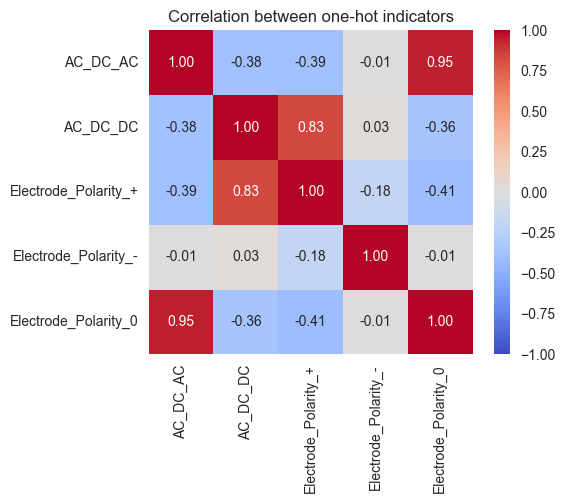

In [16]:
# Correlation between expected one-hot indicators (AC/DC and Electrode_Polarity)
expected = ['AC_DC_AC', 'AC_DC_DC', 'Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0']

# Build matrix X with 0/1 indicators for the expected columns
X = None
if 'df_onehot' in globals():
    missing = [c for c in expected if c not in df_onehot.columns]
    if not missing:
        X = df_onehot[expected].astype(int)
    else:
        print(f"df_onehot is missing columns: {missing} — reconstructing from df.")

if X is None:
    if set(expected).issubset(df.columns):
        X = df[expected].astype(int)
    else:
        # Reconstruct from raw categorical columns
        base_cols = ['AC_DC', 'Electrode_Polarity']
        if not set(base_cols).issubset(df.columns):
            raise ValueError("Required columns not found to build one-hot features.")
        tmp = df[base_cols].copy()
        tmp['AC_DC'] = tmp['AC_DC'].astype(str).str.strip().str.upper()
        tmp['Electrode_Polarity'] = tmp['Electrode_Polarity'].astype(str).str.strip()
        ohe = pd.get_dummies(tmp, columns=base_cols, prefix=base_cols, dtype=int)
        for c in expected:
            if c not in ohe.columns:
                ohe[c] = 0
        X = ohe[expected].astype(int)

# Sanity: counts per indicator
print("Counts per indicator (1=True):")
print(X.sum().to_string())

# Pearson correlation for binary indicators is the Phi coefficient
corr = X.corr(method='pearson')
print("\nCorrelation matrix (Phi coefficients):")
print(corr)

# Optional heatmap
try:
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', square=True, fmt='.2f')
    plt.title('Correlation between one-hot indicators')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Could not plot heatmap: {e}")

The correlation map shows a strong relationship between **current type (AC/DC)** and **electrode polarity**, meaning these two categorical variables express almost the same information. The pairs `AC_DC_AC` ↔ `Electrode_Polarity_0` (0.95) and `AC_DC_DC` ↔ `Electrode_Polarity_+` (0.83) confirm that polarity is largely determined by the current mode. Since they are redundant, keeping both would add unnecessary collinearity. Therefore, it is more consistent to **retain the `Electrode_Polarity_*` columns** and **remove the `AC_DC_*` ones**, as polarity provides a more direct physical interpretation of the welding process and better captures how electrical setup affects the weld characteristics.


In [17]:

polarity_cols = ['Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0']

if 'df_onehot' in globals():
    # Keep only polarity columns
    df_polarity = df_onehot[polarity_cols].copy()
    print(f"Retained {len(polarity_cols)} Electrode_Polarity columns (dropped AC_DC_*)")
    print(f"Columns: {polarity_cols}")
    
    # Merge into main df (drop original categorical columns)
    df_updated = df.drop(columns=['AC_DC', 'Electrode_Polarity'], errors='ignore').copy()
    df_updated = pd.concat([df_updated, df_polarity], axis=1)
    
    print(f"\nUpdated dataframe shape: {df_updated.shape}")
    print(f"New columns added: {polarity_cols}")
    print(f"\nSample of updated df with polarity features:")
    print(df_updated[['Weld_ID'] + polarity_cols].head())
    
    # Optionally replace df with df_updated (uncomment next line)
    # df = df_updated
else:
    print("df_onehot not found. Run the one-hot encoding cell first.")

Retained 3 Electrode_Polarity columns (dropped AC_DC_*)
Columns: ['Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0']

Updated dataframe shape: (1652, 45)
New columns added: ['Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0']

Sample of updated df with polarity features:
                         Weld_ID  Electrode_Polarity_+  Electrode_Polarity_-  \
0    Evans-Ni/CMn-1990/1991-0Aaw                  True                 False   
1  Evans-Ni/CMn-1990/1991-0Aawch                  True                 False   
2    Evans-Ni/CMn-1990/1991-0Aht                  True                 False   
3    Evans-Ni/CMn-1990/1991-0Baw                  True                 False   
4  Evans-Ni/CMn-1990/1991-0Bawch                  True                 False   

   Electrode_Polarity_0  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  


In [18]:
df_updated.dtypes.value_counts()
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carbon_%              1652 non-null   float64
 1   Silicon_%             1652 non-null   float64
 2   Manganese_%           1652 non-null   float64
 3   Sulphur_%             1648 non-null   float64
 4   Phosphorus_%          1642 non-null   float64
 5   Nickel_%              697 non-null    float64
 6   Chromium_%            784 non-null    float64
 7   Molybdenum_%          793 non-null    float64
 8   Vanadium_%            928 non-null    float64
 9   Copper_%              578 non-null    float64
 10  Cobalt_%              129 non-null    float64
 11  Tungsten_%            75 non-null     float64
 12  Oxygen_ppm            1256 non-null   float64
 13  Titanium_ppm          935 non-null    float64
 14  Nitrogen_ppm          1225 non-null   float64
 15  Aluminium_ppm        

## Feature Engineering: Electrical Power

The **Voltage** (V) and **Current** (A) columns are combined into a single **Power** column (W) based on the fundamental electrical relationship:

$$
P = V \times I
$$

where:
- $P$ is the electrical power in watts (W)
- $V$ is the voltage in volts (V)
- $I$ is the current in amperes (A)

**Physical Rationale:** Power represents the rate of energy transfer during welding, which directly influences heat input, penetration depth, and weld quality. By computing power as the product of voltage and current, we capture their interaction in a single variable, reducing redundancy while preserving complete information about the electrical energy delivered to the weld.

In [19]:
# Create Power feature from Voltage and Current into df_updated1 (robust numeric coercion)
if 'df_updated' in globals():
    df_updated1 = df_updated.copy()
    
    # Helper: convert values like '<25' or '>30' to numeric bounds (25, 30), else float; NaN on failure
    def _to_float(val):
        if pd.isna(val):
            return np.nan
        s = str(val).strip()
        m = re.match(r'^\s*[<>]=?\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s*$', s)
        if m:
            try:
                return float(m.group(1))
            except Exception:
                return np.nan
        try:
            return float(s)
        except Exception:
            return np.nan
    
    # Compute Power = Voltage × Current
    if 'Voltage_V' in df_updated1.columns and 'Current_A' in df_updated1.columns:
        # Coerce to numeric first to avoid TypeError when multiplying strings
        df_updated1['Voltage_V'] = df_updated1['Voltage_V'].map(_to_float)
        df_updated1['Current_A'] = df_updated1['Current_A'].map(_to_float)
        
        # Report any NaNs introduced by coercion
        n_v_nan = int(df_updated1['Voltage_V'].isna().sum())
        n_a_nan = int(df_updated1['Current_A'].isna().sum())
        if n_v_nan or n_a_nan:
            print(f'Note: NaNs after coercion — Voltage_V: {n_v_nan}, Current_A: {n_a_nan}')
        
        # Create power (will be NaN where either operand is NaN)
        df_updated1['Power_W'] = df_updated1['Voltage_V'] * df_updated1['Current_A']
        
        # Drop the original Voltage and Current columns
        df_updated1 = df_updated1.drop(columns=['Voltage_V', 'Current_A'], errors='ignore')
        
        print('✓ Created Power_W = Voltage_V × Current_A')
        print('✓ Dropped Voltage_V and Current_A columns')
        print('\nPower statistics:')
        print(df_updated1['Power_W'].describe())
        print(f'\nUpdated dataframe shape (df_updated1): {df_updated1.shape}')
    else:
        print('Missing Voltage_V or Current_A columns')
        df_updated1 = df_updated.copy()
else:
    print('df_updated not found. Run previous cells first.')

Note: NaNs after coercion — Voltage_V: 248, Current_A: 248
✓ Created Power_W = Voltage_V × Current_A
✓ Dropped Voltage_V and Current_A columns

Power statistics:
count     1404.000000
mean      9406.115741
std      11061.573675
min       2645.000000
25%       3570.000000
50%       3570.000000
75%       8410.000000
max      47100.000000
Name: Power_W, dtype: float64

Updated dataframe shape (df_updated1): (1652, 44)


In [20]:
# One-hot encode Weld_Type as boolean True/False into df_updated1
if 'df_updated1' in globals() and 'Weld_Type' in df_updated1.columns:
    # Prepare Weld_Type for encoding
    weld_type_series = df_updated1['Weld_Type'].astype(str).str.strip()
    
    # Create one-hot encoding with boolean dtype
    weld_ohe = pd.get_dummies(weld_type_series, prefix='Weld_Type', dtype=bool)
    
    print(f'Created {len(weld_ohe.columns)} Weld_Type one-hot columns (boolean):')
    print(weld_ohe.columns.tolist())
    print(f'\nValue counts per column:')
    print(weld_ohe.sum())
    
    # Drop original Weld_Type and merge boolean features
    df_updated1 = df_updated1.drop(columns=['Weld_Type'], errors='ignore')
    df_updated1 = pd.concat([df_updated1, weld_ohe], axis=1)
    
    print(f'\nFinal dataframe shape (df_updated1): {df_updated1.shape}')
    print(f'\nData types summary:')
    print(df_updated1.dtypes.value_counts())
    
    print(f'\nSample of df_updated1:')
    print(df_updated1.head())
else:
    print('df_updated1 or Weld_Type not found. Run previous cells first.')

Created 10 Weld_Type one-hot columns (boolean):
['Weld_Type_FCA', 'Weld_Type_GMAA', 'Weld_Type_GTAA', 'Weld_Type_MMA', 'Weld_Type_NGGMA', 'Weld_Type_NGSAW', 'Weld_Type_SA', 'Weld_Type_SAA', 'Weld_Type_ShMA', 'Weld_Type_TSA']

Value counts per column:
Weld_Type_FCA        87
Weld_Type_GMAA        4
Weld_Type_GTAA        4
Weld_Type_MMA      1140
Weld_Type_NGGMA       7
Weld_Type_NGSAW      18
Weld_Type_SA        261
Weld_Type_SAA         4
Weld_Type_ShMA       40
Weld_Type_TSA        87
dtype: int64

Final dataframe shape (df_updated1): (1652, 53)

Data types summary:
float64    39
bool       13
object      1
Name: count, dtype: int64

Sample of df_updated1:
   Carbon_%  Silicon_%  Manganese_%  Sulphur_%  Phosphorus_%  Nickel_%  \
0     0.037       0.30         0.65      0.008         0.012       0.0   
1     0.037       0.30         0.65      0.008         0.012       0.0   
2     0.037       0.30         0.65      0.008         0.012       0.0   
3     0.037       0.31         1.03   

In [21]:
df_updated1.dtypes.value_counts()
df_updated1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carbon_%              1652 non-null   float64
 1   Silicon_%             1652 non-null   float64
 2   Manganese_%           1652 non-null   float64
 3   Sulphur_%             1648 non-null   float64
 4   Phosphorus_%          1642 non-null   float64
 5   Nickel_%              697 non-null    float64
 6   Chromium_%            784 non-null    float64
 7   Molybdenum_%          793 non-null    float64
 8   Vanadium_%            928 non-null    float64
 9   Copper_%              578 non-null    float64
 10  Cobalt_%              129 non-null    float64
 11  Tungsten_%            75 non-null     float64
 12  Oxygen_ppm            1256 non-null   float64
 13  Titanium_ppm          935 non-null    float64
 14  Nitrogen_ppm          1225 non-null   float64
 15  Aluminium_ppm        

In [22]:
# Convert boolean columns to 0/1 and drop Weld_ID -> create df_updated2
if 'df_updated1' in globals():
    df_updated2 = df_updated1.copy()
    
    # Find boolean columns and convert to integers (0/1)
    bool_cols = df_updated2.select_dtypes(include=['bool']).columns.tolist()
    if bool_cols:
        df_updated2[bool_cols] = df_updated2[bool_cols].astype(int)
        print(f'Converted {len(bool_cols)} boolean columns to 0/1.')
    else:
        print('No boolean columns found to convert.')
    
    # Drop identifier column
    df_updated2 = df_updated2.drop(columns=['Weld_ID'], errors='ignore')
    print('Dropped Weld_ID (if present).')

    print('df_updated2 shape:', df_updated2.shape)
    print('Dtypes summary:\n', df_updated2.dtypes.value_counts())
    print('\nPreview:')
    print(df_updated2.head(5))
else:
    print('df_updated1 not found. Run previous cells first.')

Converted 13 boolean columns to 0/1.
Dropped Weld_ID (if present).
df_updated2 shape: (1652, 52)
Dtypes summary:
 float64    39
int32      13
Name: count, dtype: int64

Preview:
   Carbon_%  Silicon_%  Manganese_%  Sulphur_%  Phosphorus_%  Nickel_%  \
0     0.037       0.30         0.65      0.008         0.012       0.0   
1     0.037       0.30         0.65      0.008         0.012       0.0   
2     0.037       0.30         0.65      0.008         0.012       0.0   
3     0.037       0.31         1.03      0.007         0.014       0.0   
4     0.037       0.31         1.03      0.007         0.014       0.0   

   Chromium_%  Molybdenum_%  Vanadium_%  Copper_%  ...  Weld_Type_FCA  \
0         NaN           NaN         NaN       NaN  ...              0   
1         NaN           NaN         NaN       NaN  ...              0   
2         NaN           NaN         NaN       NaN  ...              0   
3         NaN           NaN         NaN       NaN  ...              0   
4         Na

In [23]:
df_updated2.dtypes.value_counts()
df_updated2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carbon_%              1652 non-null   float64
 1   Silicon_%             1652 non-null   float64
 2   Manganese_%           1652 non-null   float64
 3   Sulphur_%             1648 non-null   float64
 4   Phosphorus_%          1642 non-null   float64
 5   Nickel_%              697 non-null    float64
 6   Chromium_%            784 non-null    float64
 7   Molybdenum_%          793 non-null    float64
 8   Vanadium_%            928 non-null    float64
 9   Copper_%              578 non-null    float64
 10  Cobalt_%              129 non-null    float64
 11  Tungsten_%            75 non-null     float64
 12  Oxygen_ppm            1256 non-null   float64
 13  Titanium_ppm          935 non-null    float64
 14  Nitrogen_ppm          1225 non-null   float64
 15  Aluminium_ppm        



# *Handling of Missing Chemical Data (Based on Chapter Five, *Design of Steel Weld Deposits*)*

According to **Chapter Five** of *Design of Steel Weld Deposits* by Tracey Cool (Department of Materials Science and Metallurgy, Cambridge University), the treatment of missing chemical composition values in the experimental database followed a logical metallurgical approach:

* **Missing impurity elements (Phosphorus, Sulphur)** → replaced by their **mean values** from the dataset.
  *Justification:* these impurities are **always present** in weld metals, even if not reported, because they are unavoidable residuals from steelmaking. Setting them to zero would be unrealistic.

* **Missing intentional alloying elements (e.g., Mn, Ni, Cr, Mo, etc.)** → replaced by **zero**.
  *Justification:* if not reported, these alloying elements were **not deliberately added** to the weld and therefore exist only at negligible trace levels, close to the detection limit of standard analytical techniques.



In [24]:
# Impute chemical values in df_updated2 and create df_final
# Rule: Phosphorus_% and Sulphur_% -> fill with mean; other specified elements -> fill with 0


df_final = df_updated2.copy()

# Impurities to impute by mean
impurity_cols = ['Phosphorus_%', 'Sulphur_%']

# Elements to zero-fill (explicitly EXCLUDING Phosphorus_% and Sulphur_% as requested)
elements_to_zeo = [
    'Manganese_%', 'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%',
    'Cobalt_%', 'Tungsten_%', 'Oxygen_ppm', 'Titanium_ppm', 'Nitrogen_ppm', 'Aluminium_ppm',
    'Boron_ppm', 'Niobium_ppm', 'Tin_ppm', 'Arsenic_ppm', 'Antimony_ppm'
]

# 1) Mean-impute impurities
print('Mean-imputation for impurities (Phosphorus_%, Sulphur_%):')
for col in impurity_cols:
    if col in df_final.columns:
        n_before = int(df_final[col].isna().sum())
        if n_before:
            mean_val = df_final[col].mean(skipna=True)
            df_final[col] = df_final[col].fillna(mean_val)
        n_after = int(df_final[col].isna().sum())
        print(f"  - {col}: NaNs before={n_before}, after={n_after}")
    else:
        print(f"  - {col}: not found; skipped")

# 2) Zero-fill remaining specified alloying elements
present_zeo_cols = [c for c in elements_to_zeo if c in df_final.columns]
missing_zeo_cols = [c for c in elements_to_zeo if c not in df_final.columns]

print('\nZero-imputation for alloying elements (present in df_updated2):')
print(present_zeo_cols if present_zeo_cols else '  (none found)')
if missing_zeo_cols:
    print('\nColumns not found and skipped:')
    for s in missing_zeo_cols:
        print('  -', s)

for col in present_zeo_cols:
    n_before = int(df_final[col].isna().sum())
    if n_before:
        df_final[col] = df_final[col].fillna(0)
    n_after = int(df_final[col].isna().sum())
    print(f"  - {col}: NaNs before={n_before}, after={n_after}")

print('\nCreated df_final with impurity means and zero-imputation applied.')
print('df_final shape:', df_final.shape)
# Summary of remaining NaNs in all targeted columns
targeted_cols = [c for c in impurity_cols + elements_to_zeo if c in df_final.columns]
if targeted_cols:
    print('\nRemaining NaNs in targeted columns:')
    print(df_final[targeted_cols].isna().sum())


Mean-imputation for impurities (Phosphorus_%, Sulphur_%):
  - Phosphorus_%: NaNs before=10, after=0
  - Sulphur_%: NaNs before=4, after=0

Zero-imputation for alloying elements (present in df_updated2):
['Manganese_%', 'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%', 'Cobalt_%', 'Tungsten_%', 'Oxygen_ppm', 'Titanium_ppm', 'Nitrogen_ppm', 'Aluminium_ppm', 'Boron_ppm', 'Niobium_ppm', 'Tin_ppm', 'Arsenic_ppm', 'Antimony_ppm']
  - Manganese_%: NaNs before=0, after=0
  - Nickel_%: NaNs before=955, after=0
  - Chromium_%: NaNs before=868, after=0
  - Molybdenum_%: NaNs before=859, after=0
  - Vanadium_%: NaNs before=724, after=0
  - Copper_%: NaNs before=1074, after=0
  - Cobalt_%: NaNs before=1523, after=0
  - Tungsten_%: NaNs before=1577, after=0
  - Oxygen_ppm: NaNs before=396, after=0
  - Titanium_ppm: NaNs before=717, after=0
  - Nitrogen_ppm: NaNs before=427, after=0
  - Aluminium_ppm: NaNs before=747, after=0
  - Boron_ppm: NaNs before=1148, after=0
  - Niobium_ppm:

In [25]:
df_final.dtypes.value_counts()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carbon_%              1652 non-null   float64
 1   Silicon_%             1652 non-null   float64
 2   Manganese_%           1652 non-null   float64
 3   Sulphur_%             1652 non-null   float64
 4   Phosphorus_%          1652 non-null   float64
 5   Nickel_%              1652 non-null   float64
 6   Chromium_%            1652 non-null   float64
 7   Molybdenum_%          1652 non-null   float64
 8   Vanadium_%            1652 non-null   float64
 9   Copper_%              1652 non-null   float64
 10  Cobalt_%              1652 non-null   float64
 11  Tungsten_%            1652 non-null   float64
 12  Oxygen_ppm            1652 non-null   float64
 13  Titanium_ppm          1652 non-null   float64
 14  Nitrogen_ppm          1652 non-null   float64
 15  Aluminium_ppm        

In [26]:
df_final.describe()

,Carbon_%,Silicon_%,Manganese_%,Sulphur_%,Phosphorus_%,Nickel_%,Chromium_%,Molybdenum_%,Vanadium_%,Copper_%,...,Weld_Type_FCA,Weld_Type_GMAA,Weld_Type_GTAA,Weld_Type_MMA,Weld_Type_NGGMA,Weld_Type_NGSAW,Weld_Type_SA,Weld_Type_SAA,Weld_Type_ShMA,Weld_Type_TSA
count,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,...,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000,1652.000000
mean,0.075521,0.328577,1.202821,0.009529,0.012952,0.175108,0.997214,0.230014,0.054702,0.060236,...,0.052663,0.002421,0.002421,0.690073,0.004237,0.010896,0.157990,0.002421,0.024213,0.052663
std,0.023898,0.112455,0.382137,0.011213,0.019567,0.550553,2.333634,0.408261,0.372480,0.207828,...,0.223428,0.049162,0.049162,0.462603,0.064976,0.103845,0.364842,0.049162,0.153757,0.223428
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.000000,0.000000,0.000000,0.000400,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.030000,0.402500,0.270000,0.010000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,5.000000,1.630000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df_final.columns 

Index(['Carbon_%', 'Silicon_%', 'Manganese_%', 'Sulphur_%', 'Phosphorus_%',
       'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%',
       'Cobalt_%', 'Tungsten_%', 'Oxygen_ppm', 'Titanium_ppm', 'Nitrogen_ppm',
       'Aluminium_ppm', 'Boron_ppm', 'Niobium_ppm', 'Tin_ppm', 'Arsenic_ppm',
       'Antimony_ppm', 'Heat_Input_kJ_mm', 'Interpass_Temp_C', 'PWHT_Temp_C',
       'PWHT_Time_hours', 'Yield_Strength_MPa', 'UTS_MPa', 'Elongation_%',
       'Reduction_Area_%', 'Charpy_Temp_C', 'Charpy_Energy_J',
       'Hardness_kg_mm2', 'FATT_50%', 'Primary_Ferrite_%',
       'Ferrite_2nd_Phase_%', 'Acicular_Ferrite_%', 'Martensite_%',
       'Ferrite_Carbide_%', 'Electrode_Polarity_+', 'Electrode_Polarity_-',
       'Electrode_Polarity_0', 'Power_W', 'Weld_Type_FCA', 'Weld_Type_GMAA',
       'Weld_Type_GTAA', 'Weld_Type_MMA', 'Weld_Type_NGGMA', 'Weld_Type_NGSAW',
       'Weld_Type_SA', 'Weld_Type_SAA', 'Weld_Type_ShMA', 'Weld_Type_TSA'],
      dtype='object')

In [28]:
missing_values = df_final.isnull().sum()

missing_values[missing_values > 0]

PWHT_Temp_C              13
PWHT_Time_hours          13
Yield_Strength_MPa      872
UTS_MPa                 914
Elongation_%            952
Reduction_Area_%        947
Charpy_Temp_C           773
Charpy_Energy_J         773
Hardness_kg_mm2        1514
FATT_50%               1621
Primary_Ferrite_%      1554
Ferrite_2nd_Phase_%    1562
Acicular_Ferrite_%     1562
Martensite_%           1563
Ferrite_Carbide_%      1563
Power_W                 248
dtype: int64

## Conversion PPM to Weight%

To convert concentrations from **parts per million (ppm)** to **weight percent (wt%)**, we use the following relationship:

$$\text{wt\%} = \frac{\text{ppm}}{10{,}000}$$

or inversely:

$$\text{ppm} = \text{wt\%} \times 10{,}000$$

This conversion is applied to all trace element columns originally expressed in ppm (Oxygen, Titanium, Nitrogen, Aluminium, Boron, Niobium, Tin, Arsenic, Antimony) to ensure uniform units across all chemical composition data.

In [29]:
ppm_cols = [col for col in df_final.columns if 'ppm' in col]

print(f'Converting {len(ppm_cols)} PPM columns to weight%:')
print(ppm_cols)
df_final[ppm_cols] = df_final[ppm_cols] / 10000
df_final.columns = df_final.columns.str.replace('_ppm', '_weight%')

print(f'\n✓ Conversion complete.')
print(f'df_final shape: {df_final.shape}')

# Show the new column names
converted_cols = [col for col in df_final.columns if 'weight%' in col]
print(f'\nConverted columns ({len(converted_cols)}):')
print(converted_cols)

print(f'\nSample of converted columns:')
if converted_cols:
    print(df_final[converted_cols].head())

Converting 9 PPM columns to weight%:
['Oxygen_ppm', 'Titanium_ppm', 'Nitrogen_ppm', 'Aluminium_ppm', 'Boron_ppm', 'Niobium_ppm', 'Tin_ppm', 'Arsenic_ppm', 'Antimony_ppm']

✓ Conversion complete.
df_final shape: (1652, 52)

Converted columns (9):
['Oxygen_weight%', 'Titanium_weight%', 'Nitrogen_weight%', 'Aluminium_weight%', 'Boron_weight%', 'Niobium_weight%', 'Tin_weight%', 'Arsenic_weight%', 'Antimony_weight%']

Sample of converted columns:
   Oxygen_weight%  Titanium_weight%  Nitrogen_weight%  Aluminium_weight%  \
0             0.0               0.0               0.0                0.0   
1             0.0               0.0               0.0                0.0   
2             0.0               0.0               0.0                0.0   
3             0.0               0.0               0.0                0.0   
4             0.0               0.0               0.0                0.0   

   Boron_weight%  Niobium_weight%  Tin_weight%  Arsenic_weight%  \
0            0.0              

In [30]:
df_final['Heat_Input_J_mm'] = df_final['Heat_Input_kJ_mm'] * 1000
df_final = df_final.drop(columns=['Heat_Input_kJ_mm'])
print(f'Heat_Input_kJ_mm → Heat_Input_J_mm (×1000)')
print(f'df_final shape: {df_final.shape}')

Heat_Input_kJ_mm → Heat_Input_J_mm (×1000)
df_final shape: (1652, 52)


In [31]:
df_final.columns.tolist()

['Carbon_%',
 'Silicon_%',
 'Manganese_%',
 'Sulphur_%',
 'Phosphorus_%',
 'Nickel_%',
 'Chromium_%',
 'Molybdenum_%',
 'Vanadium_%',
 'Copper_%',
 'Cobalt_%',
 'Tungsten_%',
 'Oxygen_weight%',
 'Titanium_weight%',
 'Nitrogen_weight%',
 'Aluminium_weight%',
 'Boron_weight%',
 'Niobium_weight%',
 'Tin_weight%',
 'Arsenic_weight%',
 'Antimony_weight%',
 'Interpass_Temp_C',
 'PWHT_Temp_C',
 'PWHT_Time_hours',
 'Yield_Strength_MPa',
 'UTS_MPa',
 'Elongation_%',
 'Reduction_Area_%',
 'Charpy_Temp_C',
 'Charpy_Energy_J',
 'Hardness_kg_mm2',
 'FATT_50%',
 'Primary_Ferrite_%',
 'Ferrite_2nd_Phase_%',
 'Acicular_Ferrite_%',
 'Martensite_%',
 'Ferrite_Carbide_%',
 'Electrode_Polarity_+',
 'Electrode_Polarity_-',
 'Electrode_Polarity_0',
 'Power_W',
 'Weld_Type_FCA',
 'Weld_Type_GMAA',
 'Weld_Type_GTAA',
 'Weld_Type_MMA',
 'Weld_Type_NGGMA',
 'Weld_Type_NGSAW',
 'Weld_Type_SA',
 'Weld_Type_SAA',
 'Weld_Type_ShMA',
 'Weld_Type_TSA',
 'Heat_Input_J_mm']

In [32]:
df_final.to_csv('welddatabase\\welddb_new.csv', index=False)

In [33]:
dff = pd.read_csv('welddatabase\\welddb_new.csv')
dff.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Carbon_%              1652 non-null   float64
 1   Silicon_%             1652 non-null   float64
 2   Manganese_%           1652 non-null   float64
 3   Sulphur_%             1652 non-null   float64
 4   Phosphorus_%          1652 non-null   float64
 5   Nickel_%              1652 non-null   float64
 6   Chromium_%            1652 non-null   float64
 7   Molybdenum_%          1652 non-null   float64
 8   Vanadium_%            1652 non-null   float64
 9   Copper_%              1652 non-null   float64
 10  Cobalt_%              1652 non-null   float64
 11  Tungsten_%            1652 non-null   float64
 12  Oxygen_weight%        1652 non-null   float64
 13  Titanium_weight%      1652 non-null   float64
 14  Nitrogen_weight%      1652 non-null   float64
 15  Aluminium_weight%    